<a href="https://colab.research.google.com/github/NGUYEN-VAN-HCMUT/Code_Numerical_Method/blob/master/Condition_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Condition Number

In [2]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [3]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
x = A.solve(b)
x

⎡    2⋅√p           1      ⎤
⎢- ──────── + ─────────────⎥
⎢        1       ⎛      1 ⎞⎥
⎢  -√p + ──   √p⋅⎜-√p + ──⎟⎥
⎢        √p      ⎝      √p⎠⎥
⎢                          ⎥
⎢            1             ⎥
⎢         ────────         ⎥
⎢               1          ⎥
⎢         -√p + ──         ⎥
⎣               √p         ⎦

In [4]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

Text(0.5, 0, '$x$')

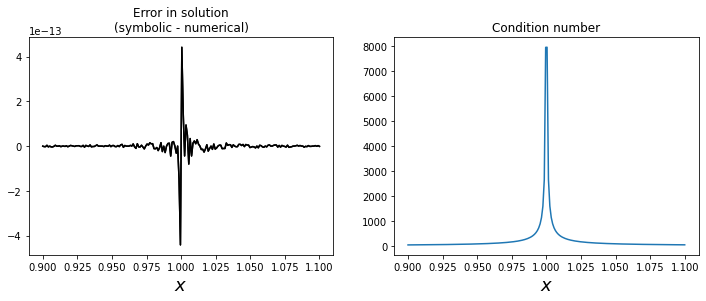

In [6]:
# Solve symbolically
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify() 

# Numerical problem specification
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
p_vec = np.linspace(0.9, 1.1, 200)

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(symbolic - numerical)")
axes[0].set_xlabel(r'$x$', fontsize=18) 
    
axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$x$', fontsize=18)